Kendra Robbins 

## Exercise 1

By taking the derivative of equation 5 we get:

$x_{uu}[F_{xx}x_u + F_{xu}] + F_{x}x_{uuu} + x_u[F_{xxx}x_{u}x_{u} + F_{xxu}x_{u} + F_{xx}x_{uu} + F_{xuu} + F_{xux}x_u] + x_{uu}[F_{xx}x_{u} + F_{xu}] + x_u[F_{uuu} + F_{xux}x_u] + F_{xu}x_{uu} + F_{uuu} + F_{uux}x_u = 0$

from which we can solve for $x_{uuu}$.

## Exercise 2

In [103]:
import numpy as np
import scipy.optimize as opt
from matplotlib import pyplot as plt

In [36]:
α=.33
z=1
b=2
t=.1
h=24
k = 5

In [48]:
kw_vec=np.array([1,1])
laborparams = [k,α,t,h]

def ldemand(w,laborparams):
    k, α, t, h = laborparams
    demand = k*((1-α)*z/w)**(1/α)
    return demand 

def profit(w,laborparams):
    k, α, t, h = laborparams
    profit = z*k**α*ldemand(w,laborparams)**(1-α) - w*ldemand(w,laborparams)
    return profit

def lsupply(w,laborparams):
    k, α, t, h = laborparams
    supply = h - b*(w*h+profit(w,laborparams)-t) /(w*(1+b))
    return supply

def findeq(w,laborparams):
    k, α, t, h = laborparams
    eq = ldemand(w,laborparams) - lsupply(w,laborparams)
    return eq 

In [129]:
def find_wage(k):
    params = [k,α,t,h]
    wage = opt.fsolve(findeq, 0.1, params)
    return wage

In [132]:
wbar = find_wage(5)
print("market clearing wage:", str(wbar))

market clearing wage: [0.62736178]


In [149]:
#first order approximation
def FOApprox(K):
    eps = 1e-6
    
    #derivative of find_wage at k=5:
    fwp = (find_wage(5+eps)- find_wage(5))/eps
    
    #first order approximation
    approx = find_wage(5)+ fwp*(K-5)
    return approx

In [150]:
#second order approximation 
def SOApprox(K):
    eps = 1e-6
    
    #derivative of find_wage at k=5:
    fwp_k = (find_wage(5+eps)- find_wage(5))/eps
    
    #derivative of find_wage at k=5+eps:
    fwp_keps = (find_wage(5+2*eps)- find_wage(5+eps))/eps
    
    #second derivative of find_wage at k=5:
    fwpp = (fwp_keps-fwp_k)/eps
    
    #second order approximation
    approx2 = find_wage(5)+ fwp_k*(K-5)+.5*fwpp*(K-5)**2
 
    return approx2

In [154]:
def getw(gridsize=10):
    kgrid = np.linspace(1,15,gridsize)
    optw = np.empty(gridsize)
    
    for i in range(gridsize):
        k = kgrid[i]
        params = [k,α,t,h]
        w_0 = .1
        w_opt=find_wage(k)
        optw[i]=w_opt
        
    return kgrid, optw

In [155]:
def graph(gridsize=10):
    kgrid,optw=getw(gridsize)
    FOA = FOApprox(kgrid)
    SOA = SOApprox(kgrid)
    
    plt.plot(kgrid,optw, label="true function")
    plt.plot(kgrid,FOA, label = "first order approximation")
    plt.plot(kgrid,SOA, label = "second order approximation")
    plt.legend()
    plt.xlim(1,15)
    plt.ylim(-1,1)
    plt.plot()

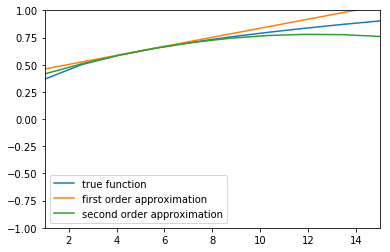

In [156]:
graph()

## Exercise 3

In [170]:
def F_error(y,x):
    F = (x**.35+.9*x-y)**(-2.5)-.95*(y**.35+.9*y)**(-2.5)
    return F 
    

In [183]:
#evaluates first derivative of f at x0
def first_deriv(f,x0, eps=1e-6):
    deriv = (f(x0+eps)-f(x0))/eps
    return deriv 
    
#second derivative of f evaluated at x0
def second_deriv(f,x0, eps=1e-6):
    deriv = (first_deriv(f,x0+eps,eps)-first_deriv(f,x0))/eps
    return deriv

def third_deriv(f,x0,eps=1e-6):
    deriv = (second_deriv(f,x0+eps,eps)-second_deriv(f,x0,eps))/eps
    return deriv

#first order approximation of f centered at x0 evaluated at x
def first_approx(f,x0,x):
    approx = f(x0) + first_deriv(f,x0)*(x-x0)
    return approx

#second order approximation of f centered at x0 evaluated at x
def second_approx(f,x0,x):
    approx = f(x0) + first_deriv(f,x0)*(x-x0) + .5*second_deriv(f,x0,x)*(x-x0)**2
    return approx 

#third order approximation of f centered at x0 evaluated at x
def third_approx(f,x0,x):
    approx = second_approx(f,x0,x)+ third_deriv(f,x0)*(x-x0)/6
    return approx 

In [184]:
def find_y(x):
    y = opt.fsolve(F_error, 50, x)
    return y


In [223]:
def plot_approximations(f=find_y,x0=100,gridsize=10):
    xgrid=np.linspace(99,101,gridsize)
    
    #first order taylor approximation:
    first_app = np.empty(gridsize)
    second_app = np.empty(gridsize)
    third_app = np.empty(gridsize)
    F = np.empty(gridsize)
    
    for i in range(gridsize):
        x=xgrid[i]
        first_app[i]= first_approx(f,x0,x)
        second_app[i]=second_approx(f,x0,x)
        third_app[i]=third_approx(f,x0,x)
        F[i]=find_y(x)
        
    plt.plot(xgrid,first_app,label="first order approximation")
    plt.plot(xgrid,second_app,label="second order approximation")
    plt.plot(xgrid,third_app,label="third order approximation")
    plt.plot(xgrid,F,label="F")
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(99,101)
    plt.ylim(45,55)
    plt.show()

    

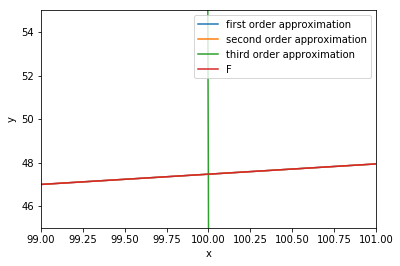

In [224]:
plot_approximations()

The remaining exercises require dolo, which has not been working for us.